In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from scipy.spatial.distance import cdist as cd
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

# <center>K-Means to calculate centroids</center>

In [2]:
def distance(a,centroids):
    index2 = np.shape(centroids)[1]
    temp = np.zeros((1,index2))
    #print(np.shape(a))
    for i in range(0,np.shape(a)[1]):
        temp = cd([a[0:a.shape[0]-1,i].transpose()],centroids[0:a.shape[0]-1,:].transpose(),metric = 'euclidean')
        closest_centroid = np.argmin(temp)
        temp2 = centroids[a.shape[0]-1,closest_centroid]
        a[a.shape[0]-1,i] = temp2
    return a

def new_centroids(a,k):
    new_centroids = np.zeros((np.shape(a)[0],k))
    for i in range(0,k):
            new_centroids[:,i] = np.mean(a[:,a[a.shape[0]-1,:]==i],axis = 1)
    #print(np.shape(new_centroids))
    return new_centroids

def init_centroids(a,k):
    centroids = np.zeros((np.shape(a)[0],k))
    for i in range(0,k):
        num = np.random.randint(0,np.shape(a)[1])
        centroids[:,i] = a[:,num]
        centroids[a.shape[0]-1,i] = i
        a[a.shape[0]-1,num] = i
    return centroids

def Kmeans(X,k):
    labels = np.zeros((1,X.shape[1]))
    X = np.append(X,labels,axis = 0)
    num_centroids = k
    X_temp = np.zeros((X.shape[0]+1,X.shape[1]))
    centroids = init_centroids(X,num_centroids)
    X_temp = distance(X,centroids)
    for i in range(0,15):
        centroids_new = new_centroids(X_temp,num_centroids)
        centroids = centroids_new
        X_temp = distance(X_temp,centroids)
    return (X_temp,centroids)

# <center>Calculate centroids and cluster means using kmeans</center>

In [3]:
data_0 = pd.read_csv('data1', sep="  ", header=None)
data_1 = pd.read_csv('data2', sep="  ", header=None)
data_2 = pd.read_csv('data3', sep="  ", header=None)

data_0 = np.array(data_0)
data_1 = np.array(data_1)
data_2 = np.array(data_2)

no_of_gaussians = 3 
data_0_clustered,centroids_0 = Kmeans(data_0.transpose(),no_of_gaussians)
data_1_clustered,centroids_1 = Kmeans(data_1.transpose(),no_of_gaussians)
data_2_clustered,centroids_2 = Kmeans(data_2.transpose(),no_of_gaussians)


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are in

# <center>K-means Vizualization for data sets</center>

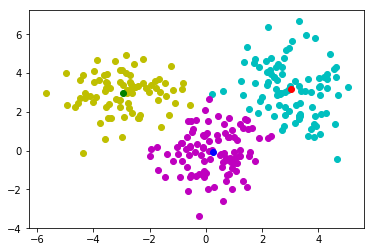

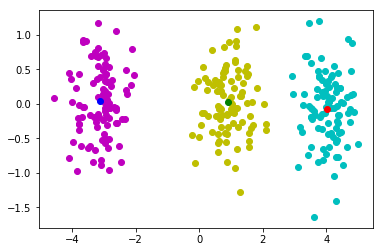

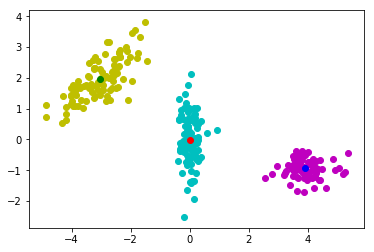

In [4]:
plt.scatter(data_0_clustered[0,data_0_clustered[2,:]==0],data_0_clustered[1,data_0_clustered[2,:]==0],c='c')
plt.scatter(data_0_clustered[0,data_0_clustered[2,:]==1],data_0_clustered[1,data_0_clustered[2,:]==1],c='m')
plt.scatter(data_0_clustered[0,data_0_clustered[2,:]==2],data_0_clustered[1,data_0_clustered[2,:]==2],c='y')
plt.scatter(centroids_0[0,0],centroids_0[1,0],c='r')
plt.scatter(centroids_0[0,1],centroids_0[1,1],c='b')
plt.scatter(centroids_0[0,2],centroids_0[1,2],c='g')
plt.show()


plt.scatter(data_1_clustered[0,data_1_clustered[2,:]==0],data_1_clustered[1,data_1_clustered[2,:]==0],c='c')
plt.scatter(data_1_clustered[0,data_1_clustered[2,:]==1],data_1_clustered[1,data_1_clustered[2,:]==1],c='m')
plt.scatter(data_1_clustered[0,data_1_clustered[2,:]==2],data_1_clustered[1,data_1_clustered[2,:]==2],c='y')
plt.scatter(centroids_1[0,0],centroids_1[1,0],c='r')
plt.scatter(centroids_1[0,1],centroids_1[1,1],c='b')
plt.scatter(centroids_1[0,2],centroids_1[1,2],c='g')
plt.show()

plt.scatter(data_2_clustered[0,data_2_clustered[2,:]==0],data_2_clustered[1,data_2_clustered[2,:]==0],c='c')
plt.scatter(data_2_clustered[0,data_2_clustered[2,:]==1],data_2_clustered[1,data_2_clustered[2,:]==1],c='m')
plt.scatter(data_2_clustered[0,data_2_clustered[2,:]==2],data_2_clustered[1,data_2_clustered[2,:]==2],c='y')
plt.scatter(centroids_2[0,0],centroids_2[1,0],c='r')
plt.scatter(centroids_2[0,1],centroids_2[1,1],c='b')
plt.scatter(centroids_2[0,2],centroids_2[1,2],c='g')
plt.show()

# <center>Regularize_cov</center>

In [5]:
def regularize_cov(covariance_fun_1, epsilon):
    for i in range(0,covariance_fun_1.shape[0]):
        u,s,vh = (np.linalg.svd(covariance_fun_1[i,:,:]))
        s = np.diag(s)

        s += epsilon * np.eye(covariance_fun_1.shape[1])
        s = np.diag(s)
        temp_svd = np.matmul(u,s)
        covariance_matrix_regularized = np.matmul(temp_svd,vh)
    return covariance_fun_1

# <center>Mstep function</center>

In [6]:
def Mstep(gamma_fun_2, X_fun_2):
    
    centroid_fun_2 = np.zeros((X_fun_2.shape[0],gamma_fun_2.shape[0]))
    temp_fun_2 = np.zeros((X_fun_2.shape[0],X_fun_2.shape[1]))
    for i in range(0,gamma_fun_2.shape[0]):
        for k in range(0,X_fun_2.shape[0]-1):
            centroid_fun_2[k,i] = np.sum(np.multiply(gamma_fun_2[i,:], X_fun_2[k,:]))
            centroid_fun_2[k,i] /= np.sum(gamma_fun_2[i,:])
    covar_fun_2 = np.zeros((centroid_fun_2.shape[1],X_fun_2.shape[0]-1,X_fun_2.shape[0]-1))
    for i in range(0,gamma_fun_2.shape[0]):
        temp_fun_2 = X_fun_2[0:X_fun_2.shape[0]-1,:].transpose() - centroid_fun_2[0:centroid_fun_2.shape[0]-1,i].transpose()
        temp_fun_2 = temp_fun_2.transpose()
        for k in range(0,X_fun_2.shape[0]-1):
            temp_fun_2[k,:] = np.multiply(gamma_fun_2[i,:],temp_fun_2[k,:])
        covar_fun_2[i,:,:] = np.matmul(temp_fun_2,temp_fun_2.transpose())
        covar_fun_2[i,:,:] /= np.sum(gamma_fun_2[i,:])
    covar_fun_2 = regularize_cov(covar_fun_2, 0.0001)
    priori_fun_2 = np.zeros(gamma_fun_2.shape[0])
    for i in range(0,gamma_fun_2.shape[0]):
        priori_fun_2[i] = np.sum(gamma_fun_2[i,:])/X_fun_2.shape[1]
    return (centroid_fun_2,covar_fun_2,priori_fun_2)
    

# <center>Estep function</center>

In [7]:
def Estep(means_fun_3, covariance_fun_3, weights_fun_3, X_fun_3):
    
             
    temp_fun_3 = np.zeros((means_fun_3.shape[1],X_fun_3.shape[1]))
    y_fun_3 = np.zeros((means_fun_3.shape[1],X_fun_3.shape[1]))
    for i in range(0,means_fun_3.shape[1]):
        for j in range(0,X_fun_3.shape[1]):
            temp_fun_3[i,j] = weights_fun_3[i]*multivariate_normal.pdf(X_fun_3[0:X_fun_3.shape[0]-1,j],means_fun_3[0:X_fun_3.shape[0]-1,i],covariance_fun_3[i,:,:],allow_singular=True)
    
    for i in range(0,means_fun_3.shape[1]):
        y_fun_3[i,:] = temp_fun_3[i,:]/temp_fun_3.sum(axis=0)
    return y_fun_3

# <center>estGaussianMixEM function</center>

In [8]:
def estGaussMixEM(data_fun_3,K_fun_3,num_iter_fun_3,epsilon_fun_3):
    data_new_fun_3,initial_centroids_new_fun_3 = Kmeans(data_fun_3.transpose(),K_fun_3) #data should be in row vector form
    cov_new_fun_3 = np.zeros((K_fun_3,data_fun_3.transpose().shape[0],data_fun_3.transpose().shape[0]))
    priori_new_fun_3 = np.zeros(K_fun_3)
    for i in range(0,K_fun_3):
        cov_new_fun_3[i,:,:] = (np.cov(data_new_fun_3[0:data_new_fun_3.shape[0]-1,data_new_fun_3[data_new_fun_3.shape[0]-1,:]==i]))
        priori_new_fun_3[i] = (data_new_fun_3[0:data_new_fun_3.shape[0]-1,data_new_fun_3[data_new_fun_3.shape[0]-1,:]==i]).shape[1]/data_new_fun_3.shape[1]
    
    gamma_fun_3 = Estep(initial_centroids_new_fun_3, cov_new_fun_3, priori_new_fun_3,data_new_fun_3)
    for i in range(0, num_iter_fun_3):
        initial_centroids_new_fun_3, cov_new_fun_3, priori_new_fun_3 = Mstep(gamma_fun_3,data_new_fun_3)
        gamma_fun_3 = Estep(initial_centroids_new_fun_3, cov_new_fun_3, priori_new_fun_3,data_new_fun_3)
    

    return (initial_centroids_new_fun_3, cov_new_fun_3, priori_new_fun_3, data_new_fun_3)

# <center>Visualizing fitted gaussians for data set 3</center>

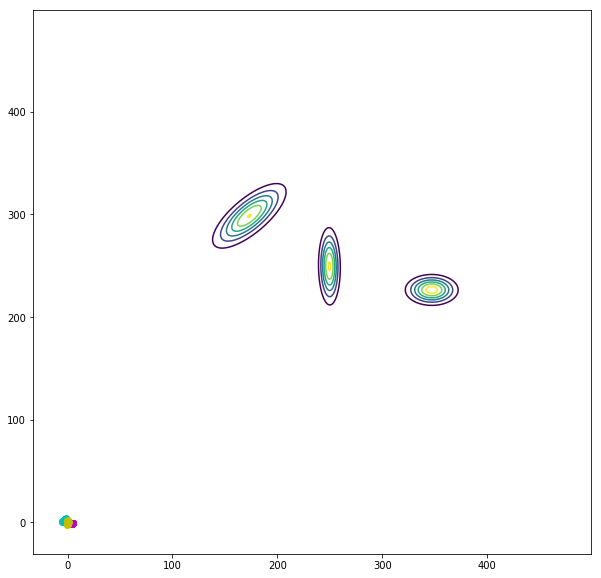

In [9]:
centroi_, covari_, prior_,data_ = estGaussMixEM(data_2,3,50,0.001)

g = np.linspace(-10,10,500)
h = np.linspace(-10,10,500)
G,H = np.meshgrid(g,h)

pos_ = np.array([G.flatten(),H.flatten()]).T



rv_1 = multivariate_normal(centroi_[0:2,0], covari_[0,:,:])
rv_2 = multivariate_normal(centroi_[0:2,1], covari_[1,:,:])
rv_3 = multivariate_normal(centroi_[0:2,2], covari_[2,:,:])

fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.contour(rv_1.pdf(pos_).reshape(500,500))
ax0.contour(rv_2.pdf(pos_).reshape(500,500))
ax0.contour(rv_3.pdf(pos_).reshape(500,500))



ax0.scatter(data_[0,data_[2,:]==0],data_[1,data_[2,:]==0],c='c')
ax0.scatter(data_[0,data_[2,:]==1],data_[1,data_[2,:]==1],c='m')
ax0.scatter(data_[0,data_[2,:]==2],data_[1,data_[2,:]==2],c='y')



plt.show()


# <center> Skin model Training </center>

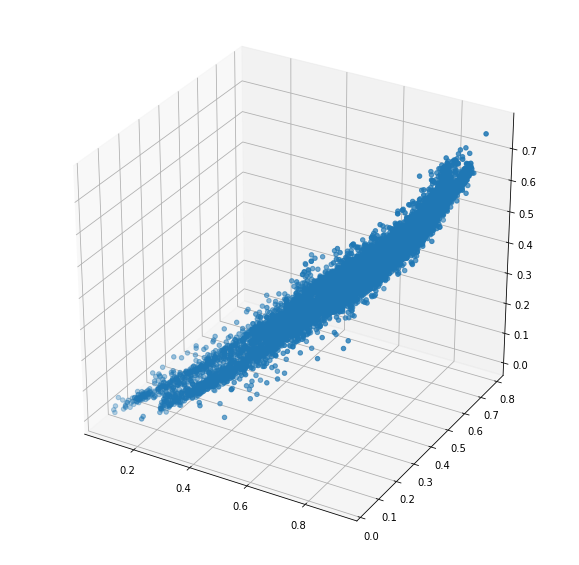

In [10]:
skin = pd.read_csv('skin.dat', sep=" ", header=None)
skin = np.array(skin)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(skin[:,0],skin[:,1],skin[:,2])
plt.show()

centroi_skin, covari_skin, prior_skin, data_skin = estGaussMixEM(skin,1,50,0.001)

# <center>Mixture model of single gaussian</center>

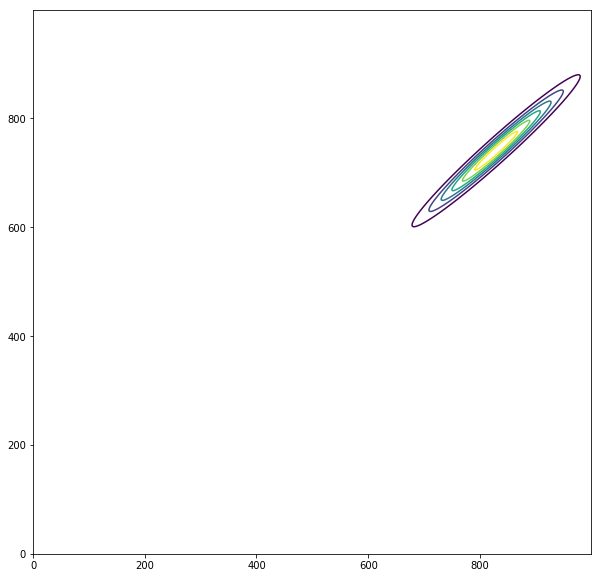

In [11]:
g = np.linspace(-1,1,1000)
h = np.linspace(-1,1,1000)
G,H = np.meshgrid(g,h)

pos_ = np.array([G.flatten(),H.flatten()]).T



rv_1 = multivariate_normal(centroi_skin[0:2,0], covari_skin[0,0:2,0:2])
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
ax0.contour(rv_1.pdf(pos_).reshape(1000,1000))
plt.show()

# <center>Non skin model training</center>

b'Skipping line 3035: expected 3 fields, saw 19\nSkipping line 3111: expected 3 fields, saw 19\nSkipping line 3124: expected 3 fields, saw 19\nSkipping line 3137: expected 3 fields, saw 19\nSkipping line 3539: expected 3 fields, saw 19\nSkipping line 3627: expected 3 fields, saw 19\nSkipping line 3642: expected 3 fields, saw 19\nSkipping line 3846: expected 3 fields, saw 19\nSkipping line 3921: expected 3 fields, saw 19\nSkipping line 3935: expected 3 fields, saw 19\nSkipping line 4006: expected 3 fields, saw 19\nSkipping line 4195: expected 3 fields, saw 19\nSkipping line 4210: expected 3 fields, saw 19\nSkipping line 4693: expected 3 fields, saw 19\nSkipping line 4727: expected 3 fields, saw 19\nSkipping line 4773: expected 3 fields, saw 19\nSkipping line 4797: expected 3 fields, saw 19\nSkipping line 4834: expected 3 fields, saw 19\nSkipping line 4872: expected 3 fields, saw 19\nSkipping line 5015: expected 3 fields, saw 19\nSkipping line 5042: expected 3 fields, saw 19\nSkipping li

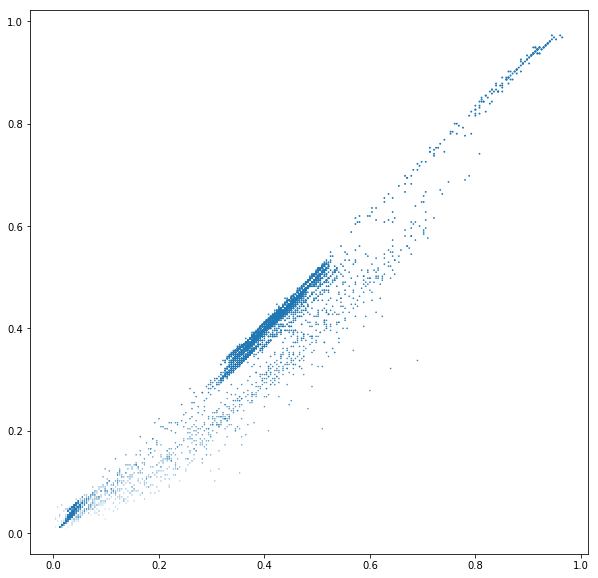

In [17]:
non_skin = pd.read_csv('non-skin.txt', sep=" ", header=None, error_bad_lines=False)
non_skin = np.array(non_skin)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)
ax1.scatter(non_skin[:,0],non_skin[:,1],non_skin[:,2])

plt.show()

centroi_non_skin, covari_non_skin, prior_non_skin, data_non_skin = estGaussMixEM(non_skin,6,50,0.001)

# <center> Mixture model of 6 gaussians </center>

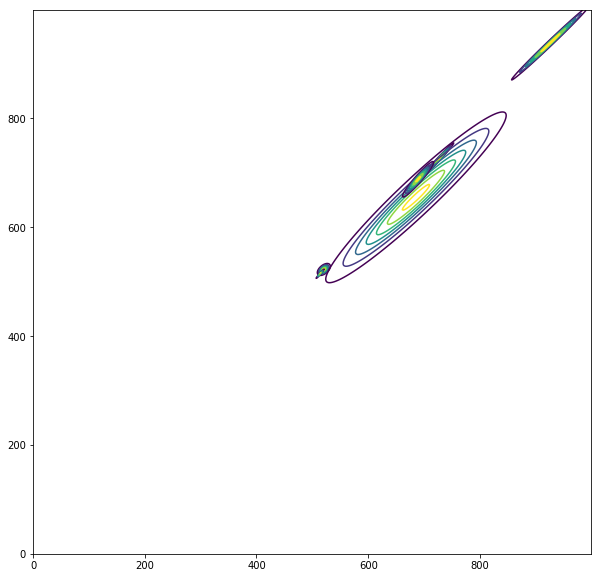

In [18]:
g = np.linspace(-1,1,1000)
h = np.linspace(-1,1,1000)
G,H = np.meshgrid(g,h)

pos_ = np.array([G.flatten(),H.flatten()]).T



rv_1 = multivariate_normal(centroi_non_skin[0:2,0], covari_non_skin[0,0:2,0:2])
rv_2 = multivariate_normal(centroi_non_skin[0:2,1], covari_non_skin[1,0:2,0:2])
rv_3 = multivariate_normal(centroi_non_skin[0:2,2], covari_non_skin[2,0:2,0:2])
rv_4 = multivariate_normal(centroi_non_skin[0:2,3], covari_non_skin[3,0:2,0:2])
rv_5 = multivariate_normal(centroi_non_skin[0:2,4], covari_non_skin[4,0:2,0:2])
rv_6 = multivariate_normal(centroi_non_skin[0:2,5], covari_non_skin[5,0:2,0:2])

fig = plt.figure(figsize=(10,10))

ax0 = fig.add_subplot(111)
ax0.contour(rv_1.pdf(pos_).reshape(1000,1000))
ax0.contour(rv_2.pdf(pos_).reshape(1000,1000))
ax0.contour(rv_3.pdf(pos_).reshape(1000,1000))
ax0.contour(rv_4.pdf(pos_).reshape(1000,1000))
ax0.contour(rv_5.pdf(pos_).reshape(1000,1000))
ax0.contour(rv_6.pdf(pos_).reshape(1000,1000))

plt.show()

# <center>Classify skin for given image</center>

In [19]:
def classify(dat,centroid_a,covari_a,centroid_b,covari_b,confidence):
    if((multivariate_normal.pdf(dat,centroid_a,covari_a))/(multivariate_normal.pdf(dat,centroid_b,covari_b)) > confidence):
        return 1
    else:
        return 0 

The parameter theta is just the confidence level that a pixel belongs to gaussian of skin instead of nonskin. Lets say that if theta is said to be 5 then, those pixel would be highlighted which are 5 times as close to skin gaussia as compared to non skin gaussians.

In [54]:
def findskin(X_image_1):
    theta = 2
    new_image = np.zeros((X_image_1.shape[0]))

    lenght_image = X_image_1.shape[0]
    #height_image = X_image_1.shape[1]

    for i in range(0,lenght_image):
        #for j in range(0,height_image):
            if(classify(X_image_1[i,0:3],centroi_skin[0:3,0],covari_skin[0,:,:],centroi_non_skin[0:3,0],covari_non_skin[0,:,:],theta)):
                if(classify(X_image_1[i,0:3],centroi_skin[0:3,0],covari_skin[0,:,:],centroi_non_skin[0:3,1],covari_non_skin[1,:,:],theta)):
                    if(classify(X_image_1[i,0:3],centroi_skin[0:3,0],covari_skin[0,:,:],centroi_non_skin[0:3,2],covari_non_skin[2,:,:],theta)):
                        if(classify(X_image_1[i,0:3],centroi_skin[0:3,0],covari_skin[0,:,:],centroi_non_skin[0:3,3],covari_non_skin[3,:,:],theta)):
                            if(classify(X_image_1[i,0:3],centroi_skin[0:3,0],covari_skin[0,:,:],centroi_non_skin[0:3,4],covari_non_skin[4,:,:],theta)):
                                if(classify(X_image_1[i,0:3],centroi_skin[0:3,0],covari_skin[0,:,:],centroi_non_skin[0:3,5],covari_non_skin[5,:,:],theta)):
                                    new_image[i] = 255
            else:
                new_image[i] = 0
    #plt.imshow(new_image,cmap="gray")
    #plt.show()
    return new_image

This wont work with noisy images as evident with above image taken with webcam

# <center>Multiprocessing attempt</center>

In [129]:
import multiprocessing
from PIL import Image
#Image.close()
#image = Image.open('faces.png')
X_image = np.array(image)
image.close()


imgplot = plt.imshow(X_image)
plt.show()        

X_image_temp = X_image
X_image_temp = X_image_temp/255
lenght_image = X_image.shape[0]
height_image = X_image.shape[1]
print(lenght_image,height_image)
X_image_temp = np.reshape(X_image_temp,(lenght_image*height_image,3))
print(X_image_temp.shape)

chunks = [X_image_temp[i::1] for i in range(1)]
print(np.array(chunks).shape)

if __name__ == "__main__":
    p= multiprocessing.Pool(10) 
    m = multiprocessing.Manager()
    event = m.Event()        
    p.apply_async(findskin , (chunks,event))
    p.close()

    event.wait()  # We'll block here until a worker calls `event.set()`
    p.terminate() # Terminate all processes in the Pool


new_image_total = np.array(new_image_total)
new_image_total = np.reshape(new_image_total,(293, 400))
imgplot = plt.imshow(new_image_total,cmap="gray")
plt.show()        

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-129-b7164eb049f9>", line 9, in <module>
    imgplot = plt.imshow(X_image)
  File "/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/pyplot.py", line 3101, in imshow
    **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/__init__.py", line 1717, in inner
  File "/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/axes/_axes.py", line 5127, in imshow
  File "/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/image.py", line 607, in set_data
TypeError: Image data cannot be converted to float

During handling of the above exception, another exception occurred:

Traceback 

TypeError: Image data cannot be converted to float

In [128]:
from PIL import Image

image = Image.open('faces.png')
X_image = np.array(image)
imgplot = plt.imshow(X_image)
plt.show()
X_image = X_image/255
findskin(X_image)

image2 = Image.open('test.jpg')
X_image_2 = np.array(image2)
imgplot_2 = plt.imshow(X_image_2)
plt.show()
X_image_2 = X_image_2/255
findskin(X_image_2)



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-128-eb2d4b906936>", line 3, in <module>
    image = Image.open('faces.png')
  File "/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/PIL/Image.py", line 2543, in open
OSError: [Errno 24] Too many open files: 'faces.png'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/IPython/core/interactiveshell.py", line 1828, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/Frameworks/

OSError: [Errno 24] Too many open files: 'faces.png'